# Project: Investigate a Dataset of Movies

## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Data Assessing</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [2]:
import pandas as pd, numpy as np
import requests, tweepy, json
import time
import string

<a id='gathering'></a>

## Data Gathering

### Main table

Download manually.

In [215]:
df_main = pd.read_csv('twitter-archive-enhanced.csv')
main = df_main.copy()

In [216]:
main.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Category table

Download programmatically from Udacity's server.

In [217]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [218]:
response = requests.get(url)

In [219]:
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [220]:
df_category = pd.read_csv('image_predictions.tsv', sep = '\t')
category = df_category.copy()

In [221]:
category.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Tweet counts table

Download using tweeter's API. First download the favorite_count and retweet_count to 'tweet_json.txt'.

In [9]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [11]:
failed_id_list = []
total_id = main.shape[0]
count_id = 0

start_time = time.time()
with open('tweet_json.txt','w') as file:
    for tweet_id in main.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            tweet_counts = {'tweet_id': tweet_id,
                            'favorite_count': tweet.favorite_count,
                            'retweet_count': tweet.retweet_count}
            json.dump(tweet_counts, file)
            file.write('\n')
            end_time = time.time()
            count_id += 1
            print('{}/{}'.format(count_id, total_id), tweet_id, 'is done, running time:', end_time-start_time)
        except:
            failed_id_list.append(tweet_id)
            end_time = time.time()
            count_id += 1
            print('{}/{}'.format(count_id, total_id), tweet_id, 'is failed, running time:', end_time-start_time)
end_time = time.time()
print('{}/{} downloaded successfully, total running time: {}'.format(total_id-len(failed_id_list), total_id, end_time-start_time))

1/2356 892420643555336193 is done, running time: 0.35502028465270996
2/2356 892177421306343426 is done, running time: 0.6390364170074463
3/2356 891815181378084864 is done, running time: 1.0160582065582275
4/2356 891689557279858688 is done, running time: 1.3610777854919434
5/2356 891327558926688256 is done, running time: 1.6610949039459229
6/2356 891087950875897856 is done, running time: 1.9481112957000732
7/2356 890971913173991426 is done, running time: 2.5801475048065186
8/2356 890729181411237888 is done, running time: 2.9061660766601562
9/2356 890609185150312448 is done, running time: 3.220184087753296
10/2356 890240255349198849 is done, running time: 3.586205005645752
11/2356 890006608113172480 is done, running time: 3.9152238368988037
12/2356 889880896479866881 is done, running time: 4.2402424812316895
13/2356 889665388333682689 is done, running time: 4.56826114654541
14/2356 889638837579907072 is done, running time: 4.883279085159302
15/2356 889531135344209921 is done, running tim

121/2356 869702957897576449 is done, running time: 46.753674030303955
122/2356 869596645499047938 is done, running time: 47.109694480895996
123/2356 869227993411051520 is done, running time: 47.47271537780762
124/2356 868880397819494401 is done, running time: 47.79673361778259
125/2356 868639477480148993 is done, running time: 48.12175226211548
126/2356 868622495443632128 is done, running time: 48.406768560409546
127/2356 868552278524837888 is done, running time: 48.69178485870361
128/2356 867900495410671616 is done, running time: 49.012803077697754
129/2356 867774946302451713 is done, running time: 49.33882188796997
130/2356 867421006826221569 is done, running time: 49.949856758117676
131/2356 867072653475098625 is done, running time: 50.263874769210815
132/2356 867051520902168576 is done, running time: 50.591893434524536
133/2356 866816280283807744 is failed, running time: 50.88991045951843
134/2356 866720684873056260 is done, running time: 51.23193001747131
135/2356 8666868248270684

240/2356 846874817362120707 is done, running time: 94.92542934417725
241/2356 846514051647705089 is done, running time: 95.25644826889038
242/2356 846505985330044928 is done, running time: 95.61246848106384
243/2356 846153765933735936 is done, running time: 95.92048621177673
244/2356 846139713627017216 is done, running time: 96.28850746154785
245/2356 846042936437604353 is done, running time: 96.65252804756165
246/2356 845812042753855489 is done, running time: 97.30156517028809
247/2356 845677943972139009 is done, running time: 97.71358871459961
248/2356 845459076796616705 is failed, running time: 98.05060815811157
249/2356 845397057150107648 is done, running time: 98.39762783050537
250/2356 845306882940190720 is done, running time: 98.73464727401733
251/2356 845098359547420673 is done, running time: 99.09366750717163
252/2356 844979544864018432 is done, running time: 99.4206862449646
253/2356 844973813909606400 is done, running time: 99.78770732879639
254/2356 844704788403113984 is do

358/2356 830173239259324417 is done, running time: 140.0870122909546
359/2356 830097400375152640 is done, running time: 140.39903020858765
360/2356 829878982036299777 is done, running time: 140.73604941368103
361/2356 829861396166877184 is done, running time: 141.05806803703308
362/2356 829501995190984704 is done, running time: 141.37308597564697
363/2356 829449946868879360 is done, running time: 141.70010471343994
364/2356 829374341691346946 is done, running time: 142.02812337875366
365/2356 829141528400556032 is done, running time: 142.36614274978638
366/2356 829011960981237760 is done, running time: 142.71516251564026
367/2356 828801551087042563 is done, running time: 143.05618238449097
368/2356 828770345708580865 is done, running time: 143.37120032310486
369/2356 828708714936930305 is done, running time: 143.71521997451782
370/2356 828650029636317184 is done, running time: 144.02923774719238
371/2356 828409743546925057 is done, running time: 145.26630854606628
372/2356 828408677031

476/2356 816062466425819140 is done, running time: 182.02941131591797
477/2356 816014286006976512 is done, running time: 182.32742834091187
478/2356 815990720817401858 is done, running time: 182.65544724464417
479/2356 815966073409433600 is done, running time: 182.97946572303772
480/2356 815745968457060357 is done, running time: 183.30348420143127
481/2356 815736392542261248 is done, running time: 183.60650157928467
482/2356 815639385530101762 is done, running time: 183.91851925849915
483/2356 815390420867969024 is done, running time: 184.28854060173035
484/2356 814986499976527872 is done, running time: 184.6095588207245
485/2356 814638523311648768 is done, running time: 184.91257619857788
486/2356 814578408554463233 is done, running time: 185.24159502983093
487/2356 814530161257443328 is done, running time: 185.55561327934265
488/2356 814153002265309185 is done, running time: 185.86363053321838
489/2356 813944609378369540 is done, running time: 186.16364765167236
490/2356 813910438903

594/2356 798925684722855936 is done, running time: 221.74968314170837
595/2356 798705661114773508 is done, running time: 222.12170433998108
596/2356 798701998996647937 is done, running time: 222.45172333717346
597/2356 798697898615730177 is done, running time: 222.79674315452576
598/2356 798694562394996736 is done, running time: 223.15676355361938
599/2356 798686750113755136 is done, running time: 223.54778599739075
600/2356 798682547630837760 is done, running time: 223.87480473518372
601/2356 798673117451325440 is done, running time: 224.20582365989685
602/2356 798665375516884993 is done, running time: 224.52584195137024
603/2356 798644042770751489 is done, running time: 224.83985996246338
604/2356 798628517273620480 is done, running time: 225.19688034057617
605/2356 798585098161549313 is done, running time: 225.51389861106873
606/2356 798576900688019456 is done, running time: 225.83991742134094
607/2356 798340744599797760 is done, running time: 226.16393566131592
608/2356 79820983930

712/2356 784517518371221505 is done, running time: 263.88109278678894
713/2356 784431430411685888 is done, running time: 264.17210960388184
714/2356 784183165795655680 is done, running time: 264.51512932777405
715/2356 784057939640352768 is done, running time: 264.8931510448456
716/2356 783839966405230592 is done, running time: 265.1731667518616
717/2356 783821107061198850 is done, running time: 265.46118354797363
718/2356 783695101801398276 is done, running time: 265.7752013206482
719/2356 783466772167098368 is done, running time: 267.0862762928009
720/2356 783391753726550016 is done, running time: 267.3792932033539
721/2356 783347506784731136 is done, running time: 267.69831109046936
722/2356 783334639985389568 is done, running time: 268.01632952690125
723/2356 783085703974514689 is done, running time: 268.3333475589752
724/2356 782969140009107456 is done, running time: 268.67936754226685
725/2356 782747134529531904 is done, running time: 268.9763844013214
726/2356 782722598790725632

830/2356 768909767477751808 is done, running time: 302.4592995643616
831/2356 768855141948723200 is done, running time: 302.78131794929504
832/2356 768609597686943744 is done, running time: 303.09033584594727
833/2356 768596291618299904 is done, running time: 303.4003531932831
834/2356 768554158521745409 is done, running time: 303.70037055015564
835/2356 768473857036525572 is done, running time: 304.0193886756897
836/2356 768193404517830656 is done, running time: 304.34640741348267
837/2356 767884188863397888 is done, running time: 304.6354238986969
838/2356 767754930266464257 is done, running time: 304.92744064331055
839/2356 767500508068192258 is done, running time: 305.21145701408386
840/2356 767191397493538821 is done, running time: 305.5074739456177
841/2356 767122157629476866 is done, running time: 306.0965075492859
842/2356 766864461642756096 is done, running time: 306.3825240135193
843/2356 766793450729734144 is done, running time: 306.70154213905334
844/2356 766714921925144576

949/2356 752334515931054080 is done, running time: 343.14962697029114
950/2356 752309394570878976 is done, running time: 343.44064354896545
951/2356 752173152931807232 is done, running time: 343.7496612071991
952/2356 751950017322246144 is done, running time: 345.2917494773865
953/2356 751937170840121344 is done, running time: 345.62576842308044
954/2356 751830394383790080 is done, running time: 345.9307861328125
955/2356 751793661361422336 is done, running time: 346.2338032722473
956/2356 751598357617971201 is done, running time: 346.52281975746155
957/2356 751583847268179968 is done, running time: 346.8178367614746
958/2356 751538714308972544 is done, running time: 347.10985350608826
959/2356 751456908746354688 is done, running time: 347.4118707180023
960/2356 751251247299190784 is done, running time: 347.72088837623596
961/2356 751205363882532864 is done, running time: 349.02396297454834
962/2356 751132876104687617 is done, running time: 349.38598346710205
963/2356 75086878289005773

1067/2356 740699697422163968 is done, running time: 387.7461779117584
1068/2356 740676976021798912 is done, running time: 388.04519486427307
1069/2356 740373189193256964 is done, running time: 388.3612129688263
1070/2356 740365076218183684 is done, running time: 388.6692306995392
1071/2356 740359016048689152 is done, running time: 388.9772479534149
1072/2356 740214038584557568 is done, running time: 389.2882659435272
1073/2356 739979191639244800 is done, running time: 389.59728360176086
1074/2356 739932936087216128 is done, running time: 389.89230036735535
1075/2356 739844404073074688 is done, running time: 390.21731901168823
1076/2356 739623569819336705 is done, running time: 390.5243365764618
1077/2356 739606147276148736 is done, running time: 390.8273539543152
1078/2356 739544079319588864 is done, running time: 391.1423718929291
1079/2356 739485634323156992 is done, running time: 391.4553897380829
1080/2356 739238157791694849 is done, running time: 391.7734079360962
1081/2356 738891

1184/2356 718939241951195136 is done, running time: 427.25243735313416
1185/2356 718631497683582976 is done, running time: 427.5514545440674
1186/2356 718613305783398402 is done, running time: 427.8374707698822
1187/2356 718540630683709445 is done, running time: 428.1574890613556
1188/2356 718460005985447936 is done, running time: 428.47850728034973
1189/2356 718454725339934721 is done, running time: 428.7785246372223
1190/2356 718246886998687744 is done, running time: 429.07554149627686
1191/2356 718234618122661888 is done, running time: 429.3965599536896
1192/2356 717841801130979328 is done, running time: 430.1076006889343
1193/2356 717790033953034240 is done, running time: 430.4546203613281
1194/2356 717537687239008257 is done, running time: 430.7576379776001
1195/2356 717428917016076293 is done, running time: 431.062655210495
1196/2356 717421804990701568 is done, running time: 431.4446771144867
1197/2356 717047459982213120 is done, running time: 431.74169421195984
1198/2356 7170093

1301/2356 707693576495472641 is done, running time: 473.9151062965393
1302/2356 707629649552134146 is done, running time: 474.21212339401245
1303/2356 707610948723478529 is done, running time: 474.5481426715851
1304/2356 707420581654872064 is done, running time: 474.8741612434387
1305/2356 707411934438625280 is done, running time: 475.1671779155731
1306/2356 707387676719185920 is done, running time: 475.4911963939667
1307/2356 707377100785885184 is done, running time: 475.88721919059753
1308/2356 707315916783140866 is done, running time: 476.1692352294922
1309/2356 707297311098011648 is done, running time: 476.4972538948059
1310/2356 707059547140169728 is done, running time: 476.8172724246979
1311/2356 707038192327901184 is done, running time: 477.1372904777527
1312/2356 707021089608753152 is done, running time: 477.48631048202515
1313/2356 707014260413456384 is done, running time: 477.7633264064789
1314/2356 706904523814649856 is done, running time: 478.0723440647125
1315/2356 7069017

1418/2356 698549713696649216 is done, running time: 522.7949020862579
1419/2356 698355670425473025 is done, running time: 523.1059198379517
1420/2356 698342080612007937 is done, running time: 524.5340013504028
1421/2356 698262614669991936 is done, running time: 524.8360188007355
1422/2356 698195409219559425 is done, running time: 525.1730380058289
1423/2356 698178924120031232 is done, running time: 525.4990565776825
1424/2356 697995514407682048 is done, running time: 525.8200750350952
1425/2356 697990423684476929 is done, running time: 526.1300928592682
1426/2356 697943111201378304 is done, running time: 526.4411106109619
1427/2356 697881462549430272 is done, running time: 526.7571287155151
1428/2356 697630435728322560 is done, running time: 527.0781471729279
1429/2356 697616773278015490 is done, running time: 527.3771641254425
1430/2356 697596423848730625 is done, running time: 527.7411847114563
1431/2356 697575480820686848 is done, running time: 528.0362017154694
1432/2356 6975162145

Rate limit reached. Sleeping for: 632


1511/2356 691444869282295808 is done, running time: 1195.2103621959686
1512/2356 691416866452082688 is done, running time: 1195.529380083084
1513/2356 691321916024623104 is done, running time: 1195.8583989143372
1514/2356 691096613310316544 is done, running time: 1196.1514158248901
1515/2356 691090071332753408 is done, running time: 1196.5154366493225
1516/2356 690989312272396288 is done, running time: 1196.862456560135
1517/2356 690959652130045952 is done, running time: 1197.1624736785889
1518/2356 690938899477221376 is done, running time: 1197.4734914302826
1519/2356 690932576555528194 is done, running time: 1197.7545075416565
1520/2356 690735892932222976 is done, running time: 1198.0825262069702
1521/2356 690728923253055490 is done, running time: 1198.415545463562
1522/2356 690690673629138944 is done, running time: 1198.7165625095367
1523/2356 690649993829576704 is done, running time: 1199.003578901291
1524/2356 690607260360429569 is done, running time: 1199.3125965595245
1525/2356 

1627/2356 684800227459624960 is done, running time: 1238.0458118915558
1628/2356 684594889858887680 is done, running time: 1238.3388288021088
1629/2356 684588130326986752 is done, running time: 1238.6388459205627
1630/2356 684567543613382656 is done, running time: 1238.9248621463776
1631/2356 684538444857667585 is done, running time: 1239.2478806972504
1632/2356 684481074559381504 is done, running time: 1239.5508980751038
1633/2356 684460069371654144 is done, running time: 1239.8499150276184
1634/2356 684241637099323392 is done, running time: 1240.283940076828
1635/2356 684225744407494656 is done, running time: 1240.6139588356018
1636/2356 684222868335505415 is done, running time: 1240.9259767532349
1637/2356 684200372118904832 is done, running time: 1241.2269940376282
1638/2356 684195085588783105 is done, running time: 1241.7890260219574
1639/2356 684188786104872960 is done, running time: 1242.0660421848297
1640/2356 684177701129875456 is done, running time: 1242.4020612239838
1641/23

1743/2356 679462823135686656 is done, running time: 1279.248168706894
1744/2356 679405845277462528 is done, running time: 1279.558186531067
1745/2356 679158373988876288 is done, running time: 1279.9262075424194
1746/2356 679148763231985668 is done, running time: 1280.252226114273
1747/2356 679132435750195208 is done, running time: 1280.5712442398071
1748/2356 679111216690831360 is done, running time: 1280.8972630500793
1749/2356 679062614270468097 is done, running time: 1281.489296913147
1750/2356 679047485189439488 is done, running time: 1281.7843136787415
1751/2356 679001094530465792 is done, running time: 1282.089331150055
1752/2356 678991772295516161 is done, running time: 1282.382348060608
1753/2356 678969228704284672 is done, running time: 1282.6973659992218
1754/2356 678800283649069056 is done, running time: 1283.0373854637146
1755/2356 678798276842360832 is done, running time: 1283.3284022808075
1756/2356 678774928607469569 is done, running time: 1283.6314194202423
1757/2356 67

1859/2356 675501075957489664 is done, running time: 1321.4705839157104
1860/2356 675497103322386432 is done, running time: 1321.8076028823853
1861/2356 675489971617296384 is done, running time: 1322.138622045517
1862/2356 675483430902214656 is done, running time: 1322.476641178131
1863/2356 675432746517426176 is done, running time: 1322.769658088684
1864/2356 675372240448454658 is done, running time: 1323.0956766605377
1865/2356 675362609739206656 is done, running time: 1323.4026942253113
1866/2356 675354435921575936 is done, running time: 1323.7387132644653
1867/2356 675349384339542016 is done, running time: 1324.032730102539
1868/2356 675334060156301312 is done, running time: 1324.354748725891
1869/2356 675166823650848770 is done, running time: 1324.640764951706
1870/2356 675153376133427200 is done, running time: 1324.9267814159393
1871/2356 675149409102012420 is done, running time: 1325.2177979946136
1872/2356 675147105808306176 is done, running time: 1325.5178153514862
1873/2356 67

1975/2356 673148804208660480 is done, running time: 1364.4020392894745
1976/2356 672997845381865473 is done, running time: 1364.716057062149
1977/2356 672995267319328768 is done, running time: 1365.019074678421
1978/2356 672988786805112832 is done, running time: 1365.3300921916962
1979/2356 672984142909456390 is done, running time: 1365.8191204071045
1980/2356 672980819271634944 is done, running time: 1366.1351382732391
1981/2356 672975131468300288 is done, running time: 1366.4541566371918
1982/2356 672970152493887488 is done, running time: 1366.8221776485443
1983/2356 672968025906282496 is done, running time: 1367.1571967601776
1984/2356 672964561327235073 is done, running time: 1367.4662144184113
1985/2356 672902681409806336 is done, running time: 1367.7762322425842
1986/2356 672898206762672129 is done, running time: 1368.0852499008179
1987/2356 672884426393653248 is done, running time: 1368.4002678394318
1988/2356 672877615439593473 is done, running time: 1368.697284936905
1989/2356

2091/2356 670786190031921152 is done, running time: 1413.2008302211761
2092/2356 670783437142401025 is done, running time: 1413.5198488235474
2093/2356 670782429121134593 is done, running time: 1413.850867509842
2094/2356 670780561024270336 is done, running time: 1414.177886247635
2095/2356 670778058496974848 is done, running time: 1414.8049221038818
2096/2356 670764103623966721 is done, running time: 1415.1159398555756
2097/2356 670755717859713024 is done, running time: 1415.4509592056274
2098/2356 670733412878163972 is done, running time: 1415.7479758262634
2099/2356 670727704916926465 is done, running time: 1416.0449929237366
2100/2356 670717338665226240 is done, running time: 1416.3370096683502
2101/2356 670704688707301377 is done, running time: 1416.6390268802643
2102/2356 670691627984359425 is done, running time: 1417.214059829712
2103/2356 670679630144274432 is done, running time: 1417.5610797405243
2104/2356 670676092097810432 is done, running time: 1417.899099111557
2105/2356 

2207/2356 668631377374486528 is done, running time: 1455.6032555103302
2208/2356 668627278264475648 is done, running time: 1455.9002726078033
2209/2356 668625577880875008 is done, running time: 1456.201289653778
2210/2356 668623201287675904 is done, running time: 1456.5053071975708
2211/2356 668620235289837568 is done, running time: 1456.7903234958649
2212/2356 668614819948453888 is done, running time: 1457.109341621399
2213/2356 668587383441514497 is done, running time: 1457.4083588123322
2214/2356 668567822092664832 is done, running time: 1457.7183766365051
2215/2356 668544745690562560 is done, running time: 1459.4034729003906
2216/2356 668542336805281792 is done, running time: 1459.6984899044037
2217/2356 668537837512433665 is done, running time: 1460.035509109497
2218/2356 668528771708952576 is done, running time: 1460.3375263214111
2219/2356 668507509523615744 is done, running time: 1460.6275429725647
2220/2356 668496999348633600 is done, running time: 1460.9115591049194
2221/2356

2323/2356 666430724426358785 is done, running time: 1498.4467062950134
2324/2356 666428276349472768 is done, running time: 1498.7537236213684
2325/2356 666421158376562688 is done, running time: 1499.0957431793213
2326/2356 666418789513326592 is done, running time: 1499.3867599964142
2327/2356 666411507551481857 is done, running time: 1499.7157785892487
2328/2356 666407126856765440 is done, running time: 1500.0347969532013
2329/2356 666396247373291520 is done, running time: 1500.3658158779144
2330/2356 666373753744588802 is done, running time: 1500.6868340969086
2331/2356 666362758909284353 is done, running time: 1501.0708560943604
2332/2356 666353288456101888 is done, running time: 1501.3808739185333
2333/2356 666345417576210432 is done, running time: 1501.7158930301666
2334/2356 666337882303524864 is done, running time: 1502.0239107608795
2335/2356 666293911632134144 is done, running time: 1502.343929052353
2336/2356 666287406224695296 is done, running time: 1502.6739478111267
2337/23

Then read 'tweet_json' line by line to generate a dataframe.

In [12]:
tweet_count_list=[]
with open('tweet_json.txt') as file:
    for _ in range(total_id-len(failed_id_list)):
        temp_data = json.loads(file.readline())
        tweet_count_list.append({'tweet_id': temp_data['tweet_id'],
                                 'favorite_count': temp_data['favorite_count'],
                                 'retweet_count': temp_data['retweet_count']})

In [13]:
tweet_count = pd.DataFrame(tweet_count_list, columns=['tweet_id','favorite_count','retweet_count'])

In [14]:
tweet_count.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38074,8328
1,892177421306343426,32681,6151


Gathering data process is finished. Three tables are: main, category, tweet_count.

In [222]:
main.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [223]:
category.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [224]:
tweet_count.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38074,8328
1,892177421306343426,32681,6151


<a id='assessing'></a>

## Data Assessing

In [225]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [226]:
main.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [227]:
category.query('p1_dog==False & p2_dog==False & p3_dog==False').shape

(324, 12)

In [228]:
capital_letter_set = set(string.ascii_uppercase)
main[~main.name.str[0].isin(capital_letter_set)].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

### Things to be cleaned:
* Tidyness issue: tweet_count table should be merged into main table.
* Tidyness issue: dog 'stages' should be melted into one column.
* Tidyness issue: Add the most likely dog category into category table.

* Quality issue: Not all rows are from original ratings. Some of them are from retweets.
* Quality issue: Not all tweets have images.
* Quality issue: Remove rows whose tweet images are not dogs.
* Quality issue: Not all rating_denominator are 10.
* Quality issue: Some rows have the dog's name wrong.
* Quality issue: 'None' is not a name, should be replaced by NaN.
* Quality issue: Some rows have more than one dog 'stages'.
* Quality issue: Dog_stage should have type 'Category'.
* Quality issue: Tweet_id if oftype 'int64', should be 'string'.
* Quality issue: Timestamp has type 'string', not 'datetime'.

<a id='cleaning'></a>

## Data Cleaning

### Tidyness issue: tweet_count table should be merged into main table.

Left join main table and tweet_count table on tweet_id.

In [229]:
main.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [230]:
tweet_count.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38074,8328
1,892177421306343426,32681,6151


In [231]:
main = pd.merge(main, tweet_count, on='tweet_id', how='left')

In [232]:
main.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,38074.0,8328.0


### Quality issue: Not all rows are from original ratings. Some of them are from retweets.

Delete all rows whose in_reply_to_status_id and retweeted_status_id are not null.

In [233]:
main = main[main.in_reply_to_status_id.isnull() & main.retweeted_status_id.isnull()]

Check the other three columns are also null: in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp. 

Drop the five columns.

In [234]:
(main.in_reply_to_user_id.isnull() & main.retweeted_status_user_id.isnull() & main.retweeted_status_timestamp.isnull()).all()

True

In [235]:
main = main.drop(main.iloc[:,[1,2,6,7,8]], axis=1)

In [236]:
main.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,38074.0,8328.0


### Tidyness issue: Add the most likely dog category into category table.

In [237]:
def dog_type(row):
    if row.p1_dog == True:
        return row.p1
    elif row.p2_dog == True:
        return row.p2
    elif row.p3_dog == True:
        return row.p3
    else:
        return np.nan

In [238]:
dog_type_list = category.apply(dog_type, axis=1)

In [239]:
category = pd.concat([category, dog_type_list.rename('likely_dog_type')], axis=1)

In [240]:
category.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likely_dog_type
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


### Quality issue: Not all tweets have images.

In [241]:
main.shape

(2097, 14)

In [242]:
dog_type_temp = category[['tweet_id','likely_dog_type']]

In [243]:
main = pd.merge(main, dog_type_temp, on='tweet_id', how='inner')

In [244]:
main.shape

(1971, 15)

### Quality issue: Remove rows whose tweet images are not dogs.

In [245]:
main = main[~main.likely_dog_type.isnull()]

In [246]:
main.shape

(1666, 15)

### Quality issue: Not all rating_denominator are 10.

I want the numerator to be an interger, so I will round the new numerator.

In [247]:
def new_numerator(row):
    new_numerator = row.rating_numerator*10/row.rating_denominator
    return round(new_numerator)

In [248]:
main['rating_numerator'] = main.apply(new_numerator, axis=1)

In [249]:
main['rating_denominator'] = 10

In [250]:
main.rating_denominator.unique()

array([10], dtype=int64)

Check abnormal rating_numerator. Four numerators are too large. I check the original tweet and correct the ratings.

In [251]:
main.rating_numerator.value_counts()

12    424
10    360
11    357
13    221
9     132
8      69
7      31
14     21
6      17
5      15
4       6
3       5
2       3
75      1
34      1
26      1
27      1
0       1
Name: rating_numerator, dtype: int64

In [252]:
main.query('rating_numerator > 15')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,likely_dog_type
382,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",34,10,Sam,None,None,None,None,5697.0,1571.0,golden_retriever
499,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,19476.0,6681.0,Pomeranian
549,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,6992.0,1769.0,clumber
1359,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,1796.0,515.0,kuvasz


In [253]:
main['rating_numerator'] = main.rating_numerator.replace(75,10).replace(27,11).replace(26,11)

The actual numerators are 9.75, 11.27 and 11.26. I round these numbers to integer and replace the wrong numerators. Then I realize some of the numerators may be wrong because of the decimal point.

In [254]:
main.reset_index(drop=True, inplace = True)

In [255]:
main[~main.text.str.extract('(\d+\.\d+\/\d+?\.?\d+)', expand=False).isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,likely_dog_type
36,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,45135.0,9744.0,golden_retriever
450,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,10,10,Logan,None,None,None,None,19476.0,6681.0,Pomeranian
495,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11,10,Sophie,None,None,pupper,None,6992.0,1769.0,clumber
1190,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11,10,None,None,None,None,None,1796.0,515.0,kuvasz


The last three numerators have been correct, only need to correct the first one: 5 replaced by 13.5, which rounds to 14.

In [256]:
main.iloc[36, 5] = 14

Check for decimal point on denominator similarly.

In [257]:
main[~main.text.str.extract('(\d+?\.?\d+\/\d+\.\d+)', expand=False).isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,likely_dog_type


### Quality issue: Some rows have the dog's name wrong.

Replace names not starting with a capital letter by NaN.

In [258]:
main[~main.name.str[0].isin(set(string.ascii_uppercase))].name.value_counts()

a               46
the              7
an               4
just             3
one              3
very             3
getting          2
quite            2
space            1
not              1
incredibly       1
unacceptable     1
my               1
all              1
infuriating      1
officially       1
light            1
actually         1
Name: name, dtype: int64

In [259]:
def rename(row):
    if row['name'][0] in (set(string.ascii_uppercase)):
        return row['name']
    else:
        return 'None'

In [260]:
main['name'] = main.apply(rename, axis=1)

### Quality issue: 'None' is not a name, should be replaced by NaN.

In [261]:
def remove_none(name):
    if name == 'None':
        return np.nan
    else:
        return name

In [262]:
main['name'] = main['name'].map(remove_none)

In [263]:
main[~main.name.str[0].isin(set(string.ascii_uppercase))].name.value_counts()

Series([], Name: name, dtype: int64)

### Quality issue: Some rows have more than one dog 'stages'.

In [264]:
main.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,likely_dog_type
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,32681.0,6151.0,Chihuahua


In [265]:
main.doggo.value_counts()

None     1603
doggo      63
Name: doggo, dtype: int64

In [266]:
main.floofer.value_counts()

None       1658
floofer       8
Name: floofer, dtype: int64

In [267]:
main.pupper.value_counts()

None      1493
pupper     173
Name: pupper, dtype: int64

In [268]:
main.puppo.value_counts()

None     1644
puppo      22
Name: puppo, dtype: int64

In [269]:
main.query('floofer=="floofer"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,likely_dog_type
37,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None,22286.0,3635.0,chow
138,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,None,None,16549.0,3277.0,English_springer
382,800388270626521089,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None,11951.0,3090.0,golden_retriever
502,776218204058357768,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13,10,NaN,None,floofer,None,None,31998.0,17413.0,Samoyed
650,749317047558017024,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None,5782.0,2382.0,wire-haired_fox_terrier
725,737445876994609152,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,https://twitter.com/dog_rates/status/737445876...,13,10,NaN,None,floofer,None,None,10781.0,4762.0,Samoyed
739,733822306246479872,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None,3838.0,1075.0,Lhasa
1120,685307451701334016,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None,2173.0,471.0,Pomeranian


The second result has both 'doggo' and 'floofy' as stage. By looking at the original tweet, I notice the dog is actually a 'floofy'.

In [270]:
main.loc[138, 'doggo'] = 'None'

In [271]:
main.query('puppo=="puppo"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,likely_dog_type
11,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,None,None,None,puppo,47264.0,9844.0,Pembroke
13,889531135344209921,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo,14847.0,2202.0,golden_retriever
56,878776093423087618,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo,19086.0,4057.0,Italian_greyhound
72,874012996292530176,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo,34084.0,10274.0,Cardigan
97,867421006826221569,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo,16057.0,2512.0,Eskimo_dog
120,859607811541651456,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,NaN,None,None,None,puppo,18752.0,1604.0,golden_retriever
132,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,None,None,puppo,46171.0,18268.0,flat-coated_retriever
264,825535076884762624,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,NaN,None,None,None,puppo,55180.0,18680.0,Rottweiler
266,825026590719483904,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo,6736.0,1392.0,Eskimo_dog
275,822872901745569793,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,None,None,None,puppo,140547.0,47750.0,Lakeland_terrier


Result with index 132 has both 'doggo' and 'puppo' as stage. By looking at the original tweet, I notice the stage should be 'puppo'.

In [272]:
main.loc[132,'doggo'] = 'None'

In [178]:
main.query('doggo=="doggo" & pupper=="pupper"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,likely_dog_type
303,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None,11404.0,2925.0,curly-coated_retriever
357,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,None,pupper,None,9347.0,2409.0,golden_retriever
379,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None,8669.0,2295.0,dalmatian
579,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None,6309.0,2053.0,golden_retriever
625,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo,None,pupper,None,4652.0,1198.0,dalmatian
701,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,NaN,doggo,None,pupper,None,9915.0,3298.0,golden_retriever
742,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo,None,pupper,None,51538.0,17909.0,golden_retriever


There are 7 rows with both 'doggo' and 'pupper' as stage. By checking them one by one, I notice some tweets have two dogs while for other tweets only one stage should be kept. If there are two dogs in the picture, the two stages should be kept in two rows.

In [274]:
main.loc[303,'doggo'] = 'None'

In [275]:
main.loc[379, 'doggo'] = 'None'

In [276]:
main.loc[625, 'pupper'] = 'None'

### Tidyness issue: dog 'stages' should be melted into one column.

In [277]:
main.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,likely_dog_type
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,32681.0,6151.0,Chihuahua


In [278]:
def change_stage_value(stage):
    if stage == 'None':
        return False
    else:
        return True

In [279]:
dog_stage_temp = main[['doggo','floofer','pupper','puppo']].applymap(change_stage_value)

In [280]:
dog_stage_temp = pd.concat([main.tweet_id, dog_stage_temp], axis=1)

In [281]:
dog_stage_temp = pd.melt(dog_stage_temp, id_vars='tweet_id', var_name='stage', value_name='stage_value').sort_values('tweet_id')

In [282]:
dog_stage_temp = dog_stage_temp[dog_stage_temp.stage_value]

In [283]:
dog_stage_temp.drop('stage_value', axis=1, inplace=True)

In [284]:
dog_stage_temp[dog_stage_temp.duplicated('tweet_id', keep=False)]

,tweet_id,stage
4074,733109485275860992,pupper
742,733109485275860992,doggo
4033,741067306818797568,pupper
701,741067306818797568,doggo
579,759793422261743616,doggo
3911,759793422261743616,pupper
3689,808106460588765185,pupper
357,808106460588765185,doggo


Now the dog_stage_temp table keeps all rows with at least one stage. Next step is to merge it into the main table.

In [286]:
main = pd.merge(main, dog_stage_temp, on='tweet_id', how='left')

In [290]:
main.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [291]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670 entries, 0 to 1669
Data columns (total 12 columns):
tweet_id              1670 non-null int64
timestamp             1670 non-null object
source                1670 non-null object
text                  1670 non-null object
expanded_urls         1670 non-null object
rating_numerator      1670 non-null int64
rating_denominator    1670 non-null int64
name                  1187 non-null object
favorite_count        1668 non-null float64
retweet_count         1668 non-null float64
likely_dog_type       1670 non-null object
stage                 261 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 169.6+ KB


### Rest quality issues
* Quality issue: Dog_stage should have type 'Category'.
* Quality issue: Tweet_id if oftype 'int64', should be 'string'.
* Quality issue: Timestamp has type 'string', not 'datetime'.
* Quality issue: favorite_count and retweet_count should be intergers.

In [293]:
main.stage = main.stage.astype('category')

In [296]:
main.tweet_id = main.tweet_id.astype('str')

In [387]:
category.tweet_id = category.tweet_id.astype(str)

In [388]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id           2075 non-null object
jpg_url            2075 non-null object
img_num            2075 non-null int64
p1                 2075 non-null object
p1_conf            2075 non-null float64
p1_dog             2075 non-null bool
p2                 2075 non-null object
p2_conf            2075 non-null float64
p2_dog             2075 non-null bool
p3                 2075 non-null object
p3_conf            2075 non-null float64
p3_dog             2075 non-null bool
likely_dog_type    1751 non-null object
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 168.3+ KB


In [300]:
main.timestamp = pd.to_datetime(main.timestamp)

In [376]:
main[['favorite_count','retweet_count']] = main[['favorite_count','retweet_count']].fillna(0).astype(int)

In [380]:
main[main.favorite_count==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,likely_dog_type,stage
612,754011816964026368,2016-07-15 17:56:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,0,0,French_bulldog,NaN
1203,680055455951884288,2015-12-24 16:00:30,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,0,0,Samoyed,NaN


I notice the only two rows are tweets that no longer exist. So I decided to delete these two rows.

In [383]:
main = main[main.favorite_count!=0]

In [385]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 1669
Data columns (total 12 columns):
tweet_id              1668 non-null object
timestamp             1668 non-null datetime64[ns]
source                1668 non-null object
text                  1668 non-null object
expanded_urls         1668 non-null object
rating_numerator      1668 non-null int64
rating_denominator    1668 non-null int64
name                  1185 non-null object
favorite_count        1668 non-null int32
retweet_count         1668 non-null int32
likely_dog_type       1668 non-null object
stage                 261 non-null category
dtypes: category(1), datetime64[ns](1), int32(2), int64(2), object(6)
memory usage: 145.2+ KB


In [391]:
main.to_csv('twitter_archive_master.csv', index=False)
category.to_csv('category_predictions.csv', index=False)

<a id='conclusions'></a>

## Conclusions

In [1]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,likely_dog_type,stage
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,32681,6151,Chihuahua,NaN


In [61]:
df = df.query('rating_numerator<20 & rating_numerator >2')

### Insight 1. Bouvier_des_Flandres has highest ratings on average, while Japanese_spaniel has lowest ratings.

In [62]:
df.groupby('likely_dog_type').rating_numerator.mean().sort_values(ascending=False)

likely_dog_type
Bouvier_des_Flandres           13.000000
Saluki                         12.500000
briard                         12.333333
Tibetan_mastiff                12.250000
Border_terrier                 12.142857
standard_schnauzer             12.000000
silky_terrier                  12.000000
Gordon_setter                  11.750000
Irish_setter                   11.750000
Samoyed                        11.731707
golden_retriever               11.597484
Australian_terrier             11.500000
wire-haired_fox_terrier        11.500000
Great_Pyrenees                 11.466667
Pembroke                       11.425532
chow                           11.416667
Eskimo_dog                     11.409091
Norfolk_terrier                11.333333
Doberman                       11.333333
Greater_Swiss_Mountain_dog     11.333333
Irish_water_spaniel            11.333333
cocker_spaniel                 11.333333
Leonberg                       11.333333
kelpie                         11.307692


### Insight 2. On average, stage pupper has the least rating. Ratings of other stages are very close.

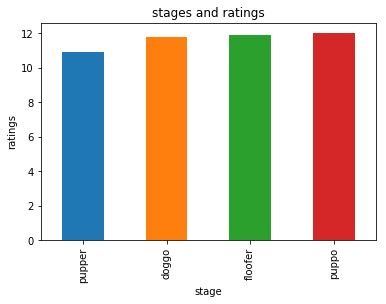

In [468]:
df.dropna(axis=0, subset = ['stage']).groupby('stage').rating_numerator.mean().sort_values().plot('bar', title='stages and ratings');
plt.ylabel('ratings');

### Insight 3: The ratings have been increasing on average over time. The inflation in ratings indicates high ratings become less valuable.

In [5]:
df.timestamp = df.timestamp.str[:7]

In [584]:
time_stamp = np.sort(df.timestamp.unique())

In [586]:
len(time_stamp)

22

Text(0,0.5,'ratings')

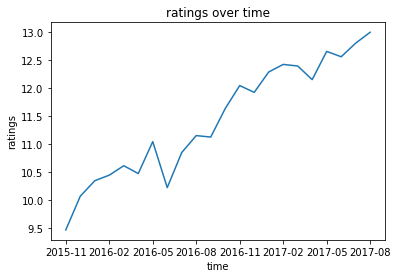

In [622]:
df.groupby('timestamp', sort=True).rating_numerator.mean().plot(title='ratings over time')
plt.xticks(np.arange(0,22,3), time_stamp[np.arange(0,22,3)]);
plt.xlabel('time');
plt.ylabel('ratings')

### Insight 4. On average, higher ratings dogs' tweets have more favorites, with a little exception at rating 6. 

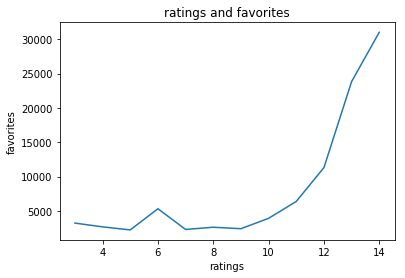

In [446]:
df.groupby('rating_numerator').favorite_count.mean().plot(title='ratings and favorites');
plt.xlabel('ratings');
plt.ylabel('favorites');

### Insight 5. We can use a degree 3 polynomial to approximate the relation between ratings and favorite counts, and use it to predict the total number of favorites based on the ratings in the future.

In [8]:
import statsmodels.api as sm

In [90]:
df['intercept']=1
df['rating_numerator_square'] = df['rating_numerator']**2
df['rating_numerator_cubed'] = df['rating_numerator']**3

In [91]:
lm = sm.OLS(df['favorite_count'], df[['intercept', 'rating_numerator', 'rating_numerator_square', 'rating_numerator_cubed']])

In [92]:
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     211.1
Date:                Thu, 03 Jan 2019   Prob (F-statistic):          5.65e-116
Time:                        17:10:25   Log-Likelihood:                -17892.
No. Observations:                1663   AIC:                         3.579e+04
Df Residuals:                    1659   BIC:                         3.581e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                -3.21e+04   1.31e+04     -2.455      0.014   -5.77e+04   -6453.111
rating_numerator          1.72e+04   4613.631      3.729      0.000    8152.814    2.63e+04
rating_numerator_square -2573.3222    519.993     -4.949      0.000   -3593.234   -1553.410
rating_numerator_cubed    120.7511     18.769      6.434      0.000      83.938     157.565
==============================================================================
Omnibus:                     1673.445   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115919.154
Skew:                           4.734   Prob(JB):                         0.00
Kurtosis:                      42.791   Cond. No.                     7.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
results.params

intercept                 -32098.510035
rating_numerator           17201.966314
rating_numerator_square    -2573.322241
rating_numerator_cubed       120.751074
dtype: float64

In [94]:
x = np.arange(3,15,1)
y = results.params[0] + results.params[1]*x + results.params[2] * (x**2) + results.params[3] * (x**3)

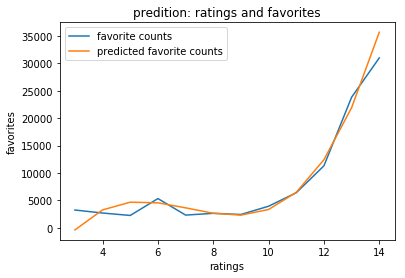

In [96]:
df.groupby('rating_numerator').favorite_count.mean().plot(title='predition: ratings and favorites');
plt.plot(x,y);
plt.xlabel('ratings');
plt.ylabel('favorites');
plt.legend(('favorite counts','predicted favorite counts'));